# **CIFAR-10** with TensorFlow

** CIFAR-10 ** is a data set that contains computer vision training data and test data built in Keras. The input format is (32x32) RGB image, also expressed as (32x32x3), and the output format is classification number.

## Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD

import numpy as np

print (tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2.4.1
Num GPUs Available:  1


## Load datasets and watch the shape

In [2]:
datasets = cifar10.load_data()
(train_X, train_Y), (test_X, test_Y) = datasets
print(np.shape(train_X))
print(np.shape(train_Y))
print(np.shape(test_X))
print(np.shape(test_Y))
train_X = train_X / 255.0
test_X = test_X / 255.0
print(np.shape(train_X))
print(np.shape(test_X))


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
labels = ['airplane','automobile','bird','cat','deer',
            'dog','frog','horse','ship','truck'	]

In [4]:
train_Y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Build and Compile the Model

In [5]:
def define_model():
    model = keras.Sequential()
    # Hidden Layer 1
    model.add(Conv2D(32, kernel_size=(3,3), activation="relu", kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(32, kernel_size=(3,3), activation="relu", kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # Hidden Layer 2
    model.add(Conv2D(64, kernel_size=(3,3), activation="relu", kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, kernel_size=(3,3), activation="relu", kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # Hidden Layer 3
    model.add(Conv2D(128, kernel_size=(3,3), activation="relu", kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, kernel_size=(3,3), activation="relu", kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



In [6]:
model = define_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

## Training

In [7]:
history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y))


Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.8660 - accuracy: 0.3191 - val_loss: 1.3318 - val_accuracy: 0.5262
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2752 - accuracy: 0.5448 - val_loss: 1.0870 - val_accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0680 - accuracy: 0.6221 - val_loss: 0.9956 - val_accuracy: 0.6455
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9110 - accuracy: 0.6803 - val_loss: 0.9365 - val_accuracy: 0.6703
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7968 - accuracy: 0.7187 - val_loss: 0.8541 - val_accuracy: 0.7018
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7034 - accuracy: 0.7541 - val_loss: 0.8961 - val_accuracy: 0.6956
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6266 - accuracy: 0.7811 - val_loss: 0.8411 - val_ac

## Visualize the Training Curve

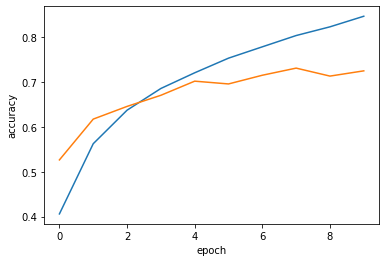

In [8]:
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['accuracy'], label='training_accuracy')
pyplot.plot(history.history['val_accuracy'], label = 'validation_accuracy')
pyplot.xlabel("epoch")
pyplot.ylabel("accuracy")

pyplot.show()

## Save Model

In [9]:
model.save('model.h5')

## Load the saved Model

In [10]:
loaded_model = keras.models.load_model('model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

## Evaluate the Model

In [11]:
test_loss, test_acc = loaded_model.evaluate(test_X,  test_Y, verbose=2)
print(f'accuracy_score is {test_acc}, loss is {test_loss}')

313/313 - 1s - loss: 0.8744 - accuracy: 0.7248
accuracy_score is 0.7247999906539917, loss is 0.8744405508041382


![img](sample.png)

In [12]:
import cv2
img = cv2.imread('sample.png')
img = cv2.resize(img, (32, 32))

data = np.array([np.array(img)/255])
data.shape

(1, 32, 32, 3)

In [13]:
pred = loaded_model.predict(data)
pred

array([[2.5921464e-03, 5.6312279e-06, 7.1182936e-02, 2.9036658e-02,
        5.7038403e-01, 1.1233610e-02, 2.4104350e-04, 3.1499451e-01,
        1.5700040e-04, 1.7245572e-04]], dtype=float32)

In [14]:
index = np.argmax(pred)
print(index)
print(labels[index])

4
deer
